In [910]:
from music21 import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [911]:
# get bach paths
paths = corpus.getComposer('bach')

paths = paths[:10]
notes = []
midi_notes = []
for path in paths:
    score = converter.parse(paths[0])

    # get the first part
    part = score.parts[0]

    # get all notes from the part
    notes.extend(list(map(lambda note: note, part.recurse().notes)))

midi_notes = list(map(lambda note: note.pitch.midi, notes))

print(f'len(notes): {len(notes)}')
print(f'len(midi_notes): {len(midi_notes)}')
print(midi_notes)

len(notes): 1530
len(midi_notes): 1530
[65, 67, 60, 65, 53, 57, 53, 57, 60, 65, 70, 69, 67, 65, 67, 69, 69, 65, 67, 69, 70, 72, 70, 69, 67, 67, 72, 72, 71, 69, 71, 72, 65, 65, 70, 69, 67, 65, 60, 65, 60, 60, 57, 53, 60, 60, 60, 57, 65, 67, 60, 65, 53, 57, 53, 57, 60, 65, 70, 69, 67, 65, 67, 69, 69, 65, 67, 69, 70, 72, 70, 69, 67, 67, 72, 72, 71, 69, 71, 72, 65, 65, 70, 69, 67, 65, 60, 65, 60, 60, 57, 53, 60, 60, 60, 57, 67, 60, 60, 60, 60, 60, 60, 65, 67, 65, 67, 69, 67, 65, 65, 60, 65, 60, 72, 70, 69, 70, 72, 70, 69, 67, 65, 60, 72, 60, 67, 65, 64, 65, 65, 53, 60, 60, 60, 57, 69, 67, 69, 70, 72, 72, 70, 69, 69, 67, 65, 65, 53, 60, 60, 60, 57, 65, 67, 60, 65, 53, 57, 53, 57, 60, 65, 70, 69, 67, 65, 67, 69, 69, 65, 67, 69, 70, 72, 70, 69, 67, 67, 72, 72, 71, 69, 71, 72, 65, 65, 70, 69, 67, 65, 60, 65, 60, 60, 57, 53, 60, 60, 60, 57, 65, 67, 60, 65, 53, 57, 53, 57, 60, 65, 70, 69, 67, 65, 67, 69, 69, 65, 67, 69, 70, 72, 70, 69, 67, 67, 72, 72, 71, 69, 71, 72, 65, 65, 70, 69, 67, 65, 60, 

In [912]:
# turn notes in to training sequences of 5
# map each sequence to note that follows
# [65, 67, 60, 65, 53] -> 57
# [67, 60, 65, 53, 57] -> 53

seq_length = 6

print(f'len(midi_notes): {len(midi_notes)}')

data = []
labels = []
for i in range(len(midi_notes)):
    seq_end = i + seq_length
    
    if seq_end >= len(midi_notes): break
    
#     print(f'i: {i}')
#     print(f'seq_end: {seq_end}')
    
    seq = midi_notes[i:seq_end]        
    data.append(seq)
    labels.append(midi_notes[seq_end])

print(f'data:\n{data[:3]}')
print(f'labels:\n{labels[:3]}')

len(midi_notes): 1530
data:
[[65, 67, 60, 65, 53, 57], [67, 60, 65, 53, 57, 53], [60, 65, 53, 57, 53, 57]]
labels:
[53, 57, 60]


In [913]:
# # normalize
# from sklearn.preprocessing import MinMaxScaler

# scaler_data = MinMaxScaler(feature_range=(0, 1))
# scaler_data = scaler.fit(data)
# data_norm = scaler_data.transform(data)

# scaler_labels = MinMaxScaler(feature_range=(0, 1))
# scaler_labels = scaler.fit(labels)
# labels_norm = scaler_labels.transform(labels)

# print(data_norm.shape)
# print(labels_norm.shape)

# for i, seq in enumerate(data_norm):
#     print(f'{seq} -> {labels_norm[i]}')

In [914]:
# get the data in shape
data = np.array(data, dtype=float)
data = data.reshape(-1, seq_length, 1)
data = data / 128

labels = np.array(labels, dtype=float)
labels = labels.reshape(-1, 1)
labels = labels / 128

print(data.shape)
print(labels.shape)

for i, seq in enumerate(data):
    print(f'{seq} -> {labels[i]}')

(1524, 6, 1)
(1524, 1)
[[0.5078125]
 [0.5234375]
 [0.46875  ]
 [0.5078125]
 [0.4140625]
 [0.4453125]] -> [0.4140625]
[[0.5234375]
 [0.46875  ]
 [0.5078125]
 [0.4140625]
 [0.4453125]
 [0.4140625]] -> [0.4453125]
[[0.46875  ]
 [0.5078125]
 [0.4140625]
 [0.4453125]
 [0.4140625]
 [0.4453125]] -> [0.46875]
[[0.5078125]
 [0.4140625]
 [0.4453125]
 [0.4140625]
 [0.4453125]
 [0.46875  ]] -> [0.5078125]
[[0.4140625]
 [0.4453125]
 [0.4140625]
 [0.4453125]
 [0.46875  ]
 [0.5078125]] -> [0.546875]
[[0.4453125]
 [0.4140625]
 [0.4453125]
 [0.46875  ]
 [0.5078125]
 [0.546875 ]] -> [0.5390625]
[[0.4140625]
 [0.4453125]
 [0.46875  ]
 [0.5078125]
 [0.546875 ]
 [0.5390625]] -> [0.5234375]
[[0.4453125]
 [0.46875  ]
 [0.5078125]
 [0.546875 ]
 [0.5390625]
 [0.5234375]] -> [0.5078125]
[[0.46875  ]
 [0.5078125]
 [0.546875 ]
 [0.5390625]
 [0.5234375]
 [0.5078125]] -> [0.5234375]
[[0.5078125]
 [0.546875 ]
 [0.5390625]
 [0.5234375]
 [0.5078125]
 [0.5234375]] -> [0.5390625]
[[0.546875 ]
 [0.5390625]
 [0.5234375]
 

 [0.46875  ]] -> [0.46875]
[[0.4453125]
 [0.5234375]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]] -> [0.46875]
[[0.5234375]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]] -> [0.46875]
[[0.46875]
 [0.46875]
 [0.46875]
 [0.46875]
 [0.46875]
 [0.46875]] -> [0.5078125]
[[0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.5078125]] -> [0.5234375]
[[0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.5078125]
 [0.5234375]] -> [0.5078125]
[[0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.5078125]
 [0.5234375]
 [0.5078125]] -> [0.5234375]
[[0.46875  ]
 [0.46875  ]
 [0.5078125]
 [0.5234375]
 [0.5078125]
 [0.5234375]] -> [0.5390625]
[[0.46875  ]
 [0.5078125]
 [0.5234375]
 [0.5078125]
 [0.5234375]
 [0.5390625]] -> [0.5234375]
[[0.5078125]
 [0.5234375]
 [0.5078125]
 [0.5234375]
 [0.5390625]
 [0.5234375]] -> [0.5078125]
[[0.5234375]
 [0.5078125]
 [0.5234375]
 [0.5390625]
 [0.5234375]
 [0.5078125]] -> [0.5078125]
[[0.5078125]
 [0.5234375]
 [0.5390625]
 [0.523437

 [0.5078125]] -> [0.46875]
[[0.5390625]
 [0.5234375]
 [0.5078125]
 [0.46875  ]
 [0.5078125]
 [0.46875  ]] -> [0.46875]
[[0.5234375]
 [0.5078125]
 [0.46875  ]
 [0.5078125]
 [0.46875  ]
 [0.46875  ]] -> [0.4453125]
[[0.5078125]
 [0.46875  ]
 [0.5078125]
 [0.46875  ]
 [0.46875  ]
 [0.4453125]] -> [0.4140625]
[[0.46875  ]
 [0.5078125]
 [0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.4140625]] -> [0.46875]
[[0.5078125]
 [0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.4140625]
 [0.46875  ]] -> [0.46875]
[[0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.4140625]
 [0.46875  ]
 [0.46875  ]] -> [0.46875]
[[0.46875  ]
 [0.4453125]
 [0.4140625]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]] -> [0.4453125]
[[0.4453125]
 [0.4140625]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.4453125]] -> [0.5078125]
[[0.4140625]
 [0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.5078125]] -> [0.5234375]
[[0.46875  ]
 [0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.5078125]
 [0.5234375]] -> [0.46875]
[[0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.

[[0.46875  ]
 [0.46875  ]
 [0.4453125]
 [0.5078125]
 [0.5234375]
 [0.46875  ]] -> [0.5078125]
[[0.46875  ]
 [0.4453125]
 [0.5078125]
 [0.5234375]
 [0.46875  ]
 [0.5078125]] -> [0.4140625]
[[0.4453125]
 [0.5078125]
 [0.5234375]
 [0.46875  ]
 [0.5078125]
 [0.4140625]] -> [0.4453125]
[[0.5078125]
 [0.5234375]
 [0.46875  ]
 [0.5078125]
 [0.4140625]
 [0.4453125]] -> [0.4140625]
[[0.5234375]
 [0.46875  ]
 [0.5078125]
 [0.4140625]
 [0.4453125]
 [0.4140625]] -> [0.4453125]
[[0.46875  ]
 [0.5078125]
 [0.4140625]
 [0.4453125]
 [0.4140625]
 [0.4453125]] -> [0.46875]
[[0.5078125]
 [0.4140625]
 [0.4453125]
 [0.4140625]
 [0.4453125]
 [0.46875  ]] -> [0.5078125]
[[0.4140625]
 [0.4453125]
 [0.4140625]
 [0.4453125]
 [0.46875  ]
 [0.5078125]] -> [0.546875]
[[0.4453125]
 [0.4140625]
 [0.4453125]
 [0.46875  ]
 [0.5078125]
 [0.546875 ]] -> [0.5390625]
[[0.4140625]
 [0.4453125]
 [0.46875  ]
 [0.5078125]
 [0.546875 ]
 [0.5390625]] -> [0.5234375]
[[0.4453125]
 [0.46875  ]
 [0.5078125]
 [0.546875 ]
 [0.5390625

In [915]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=4)

In [916]:
model = Sequential()
model.add(LSTM((512), batch_input_shape=(None, seq_length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM((256), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM((128), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM((1), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
# model.add(LSTM((1), return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))


In [917]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.input_shape)
print(model.output_shape)
print(model.summary())

(None, 6, 1)
(None, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_109 (LSTM)              (None, 6, 512)            1052672   
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 512)            0         
_________________________________________________________________
lstm_110 (LSTM)              (None, 6, 256)            787456    
_________________________________________________________________
dropout_14 (Dropout)         (None, 6, 256)            0         
_________________________________________________________________
lstm_111 (LSTM)              (None, 6, 128)            197120    
_________________________________________________________________
dropout_15 (Dropout)         (None, 6, 128)            0         
_________________________________________________________________
lstm_112 (LSTM)              (None, 1)               

In [918]:
history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test))

Train on 1219 samples, validate on 305 samples
Epoch 1/200
1219/1219 [==============================] - 15s 12ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 2/200
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 3/200
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 4/200
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 5/200
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 6/200
1219/1219 [==============================] - 3s 2ms/step - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 7/200
1219/1219 [==============================] - 2s 2ms/step - loss: 0.0017 - acc: 0.

1219/1219 [==============================] - 2s 2ms/step - loss: 8.0603e-04 - acc: 0.0000e+00 - val_loss: 6.4902e-04 - val_acc: 0.0000e+00
Epoch 57/200
1219/1219 [==============================] - 2s 2ms/step - loss: 8.3586e-04 - acc: 0.0000e+00 - val_loss: 6.5093e-04 - val_acc: 0.0000e+00
Epoch 58/200
1219/1219 [==============================] - 3s 2ms/step - loss: 8.2770e-04 - acc: 0.0000e+00 - val_loss: 7.3908e-04 - val_acc: 0.0000e+00
Epoch 59/200
1219/1219 [==============================] - 2s 2ms/step - loss: 8.6520e-04 - acc: 0.0000e+00 - val_loss: 6.6440e-04 - val_acc: 0.0000e+00
Epoch 60/200
1219/1219 [==============================] - 2s 2ms/step - loss: 7.8714e-04 - acc: 0.0000e+00 - val_loss: 7.0443e-04 - val_acc: 0.0000e+00
Epoch 61/200
1219/1219 [==============================] - 3s 2ms/step - loss: 7.9691e-04 - acc: 0.0000e+00 - val_loss: 7.2960e-04 - val_acc: 0.0000e+00
Epoch 62/200
1219/1219 [==============================] - 3s 2ms/step - loss: 9.1544e-04 - acc: 0.000

Epoch 110/200
1219/1219 [==============================] - 3s 2ms/step - loss: 6.9178e-04 - acc: 0.0000e+00 - val_loss: 7.4271e-04 - val_acc: 0.0000e+00
Epoch 111/200
1219/1219 [==============================] - 2s 2ms/step - loss: 6.9370e-04 - acc: 0.0000e+00 - val_loss: 5.9263e-04 - val_acc: 0.0000e+00
Epoch 112/200
1219/1219 [==============================] - 2s 2ms/step - loss: 6.9842e-04 - acc: 0.0000e+00 - val_loss: 6.0569e-04 - val_acc: 0.0000e+00
Epoch 113/200
1219/1219 [==============================] - 2s 2ms/step - loss: 7.3068e-04 - acc: 0.0000e+00 - val_loss: 6.1304e-04 - val_acc: 0.0000e+00
Epoch 114/200
1219/1219 [==============================] - 2s 2ms/step - loss: 6.8438e-04 - acc: 0.0000e+00 - val_loss: 6.2186e-04 - val_acc: 0.0000e+00
Epoch 115/200
1219/1219 [==============================] - 2s 2ms/step - loss: 6.6534e-04 - acc: 0.0000e+00 - val_loss: 6.1418e-04 - val_acc: 0.0000e+00
Epoch 116/200
1219/1219 [==============================] - 2s 2ms/step - loss: 6.9

1219/1219 [==============================] - 2s 2ms/step - loss: 5.9551e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 164/200
1219/1219 [==============================] - 2s 2ms/step - loss: 7.3268e-04 - acc: 0.0000e+00 - val_loss: 7.0635e-04 - val_acc: 0.0000e+00
Epoch 165/200
1219/1219 [==============================] - 3s 2ms/step - loss: 6.1005e-04 - acc: 0.0000e+00 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 166/200
1219/1219 [==============================] - 3s 2ms/step - loss: 8.6350e-04 - acc: 0.0000e+00 - val_loss: 5.6044e-04 - val_acc: 0.0000e+00
Epoch 167/200
1219/1219 [==============================] - 2s 2ms/step - loss: 6.9737e-04 - acc: 0.0000e+00 - val_loss: 5.8306e-04 - val_acc: 0.0000e+00
Epoch 168/200
1219/1219 [==============================] - 3s 3ms/step - loss: 6.0354e-04 - acc: 0.0000e+00 - val_loss: 5.5894e-04 - val_acc: 0.0000e+00
Epoch 169/200
1219/1219 [==============================] - 3s 2ms/step - loss: 5.8326e-04 - acc: 0.0000e

In [919]:
score = model.evaluate(x_test, y_test, batch_size=64)
print(score)

305/305 [==============================] - 0s 442us/step
[0.0004786094810935806, 0.0]


In [920]:
results= model.predict(x_test)
# results = results * 128
# y_test = y_test * 128
print(f'results:\n{results}')
print(f'y_test:\n{y_test}')

results:
[[0.5369098 ]
 [0.4607992 ]
 [0.5383701 ]
 [0.4898209 ]
 [0.49666968]
 [0.48193058]
 [0.44995162]
 [0.47611818]
 [0.52177155]
 [0.5391355 ]
 [0.5105083 ]
 [0.55190057]
 [0.49688676]
 [0.52171284]
 [0.49666968]
 [0.41629767]
 [0.4937407 ]
 [0.5105083 ]
 [0.5081264 ]
 [0.47793293]
 [0.48577076]
 [0.47054103]
 [0.53880906]
 [0.46035445]
 [0.47054103]
 [0.5198268 ]
 [0.49688676]
 [0.5403382 ]
 [0.47136   ]
 [0.523586  ]
 [0.43864933]
 [0.4607992 ]
 [0.47793293]
 [0.5391355 ]
 [0.49154416]
 [0.5322595 ]
 [0.43864933]
 [0.46442017]
 [0.41629767]
 [0.5242293 ]
 [0.47136   ]
 [0.5185271 ]
 [0.501458  ]
 [0.5383701 ]
 [0.52468103]
 [0.5322595 ]
 [0.5435966 ]
 [0.4993426 ]
 [0.49154416]
 [0.50814676]
 [0.5037775 ]
 [0.5105083 ]
 [0.49154416]
 [0.49876612]
 [0.54465204]
 [0.47604024]
 [0.5252869 ]
 [0.5026796 ]
 [0.4870854 ]
 [0.5081264 ]
 [0.523586  ]
 [0.55383915]
 [0.47604024]
 [0.55383915]
 [0.5081264 ]
 [0.48577076]
 [0.4993426 ]
 [0.52177155]
 [0.4870854 ]
 [0.51264894]
 [0.5202856

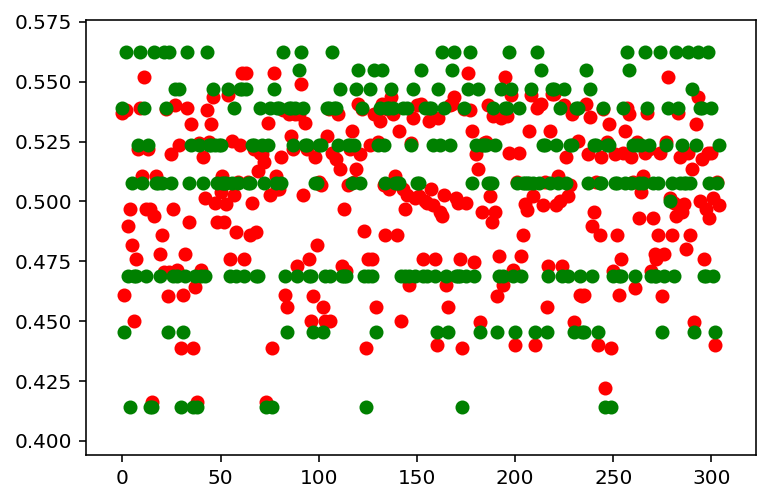

In [921]:
plt.scatter(range(len(results)), results, c='r')
plt.scatter(range(len(y_test)), y_test, c='g')

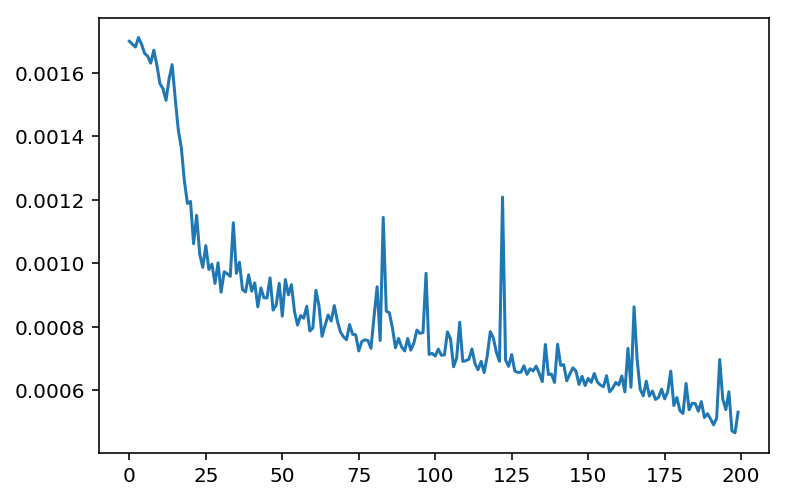

In [922]:
plt.plot(history.history['loss'])